# **Praktikum 1**

### **Langkah 1 - Import Library**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Langkah 2 - Load Data dan Visualisasi**

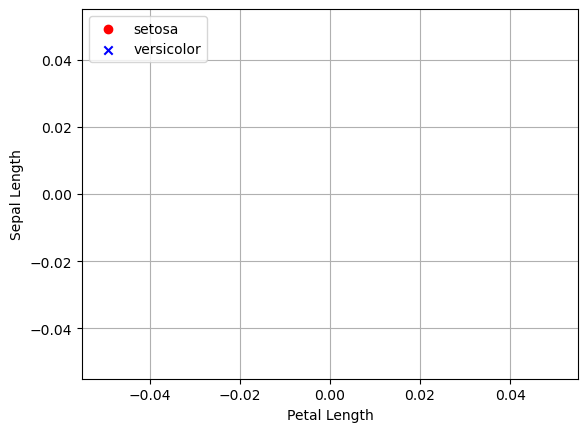

In [16]:
df = pd.read_csv('data/iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### **Langkah 3 - Membuat Kelas Perceptron**

In [17]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### **Langkah 4 - Pilih Data dan Encoding Label**

In [18]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

### **Langkah 5 - Fitting Model**

In [19]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

TypeError: can't multiply sequence by non-int of type 'float'